# Project: Identify Customer Segments. Data wrangling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

There are three files associated with this project:

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

In [2]:
# Load in the general demographics data
azdias = pd.read_csv("Udacity_AZDIAS_Subset.csv",sep=";")

# Load in the feature summary file
feat_info = pd.read_csv("AZDIAS_Feature_Summary.csv",sep = ";")

In [3]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [4]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

## Step 1: Preprocessing

#### Step 1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data.

In [5]:
#parsing
def list_as_str_into_list (st):
    lst = []
    if st == "[]":
        return np.NaN
    else:
        for x in st.strip("[]").split(","):
            try:
                lst.append(int(x))
            except:   ### if x is not an integer
                lst.append(x)
        return(lst)   

In [6]:
missing_values = feat_info.missing_or_unknown
missing_values = missing_values.apply(lambda x : list_as_str_into_list(x))

In [7]:
#setting up the dictionary
dict_missing = {x:y for x,y in zip(feat_info.attribute, missing_values)}

In [8]:
azdias = azdias.replace(dict_missing, np.NaN)

#### Step 1.2: Assess Missing Data in Each Column

How much missing data is present in each column?

In [9]:
nans = azdias.isnull().sum()
length = len(azdias)

In [10]:
nans = nans*100/length
print(nans)

AGER_TYP                 76.955435
ALTERSKATEGORIE_GROB      0.323264
ANREDE_KZ                 0.000000
CJT_GESAMTTYP             0.544646
FINANZ_MINIMALIST         0.000000
FINANZ_SPARER             0.000000
FINANZ_VORSORGER          0.000000
FINANZ_ANLEGER            0.000000
FINANZ_UNAUFFAELLIGER     0.000000
FINANZ_HAUSBAUER          0.000000
FINANZTYP                 0.000000
GEBURTSJAHR              44.020282
GFK_URLAUBERTYP           0.544646
GREEN_AVANTGARDE          0.000000
HEALTH_TYP               12.476816
LP_LEBENSPHASE_FEIN      10.954859
LP_LEBENSPHASE_GROB      10.611509
LP_FAMILIE_FEIN           8.728699
LP_FAMILIE_GROB           8.728699
LP_STATUS_FEIN            0.544646
LP_STATUS_GROB            0.544646
NATIONALITAET_KZ         12.153551
PRAEGENDE_JUGENDJAHRE    12.136608
RETOURTYP_BK_S            0.544646
SEMIO_SOZ                 0.000000
SEMIO_FAM                 0.000000
SEMIO_REL                 0.000000
SEMIO_MAT                 0.000000
SEMIO_VERT          

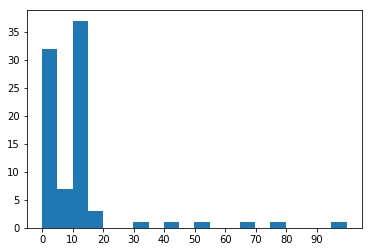

In [11]:
# Perform an assessment of how much missing data there is in each column of the
# dataset
ax = plt.subplot()
plt.hist(nans,bins=20)
ax.set_xticks(range(0,100,10))
plt.show()


In [12]:
# amount of missing data in each column
nans[nans>30].count()


6

In [13]:
# Remove the outliers
nans[nans>30].index

Index(['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP',
       'KBA05_BAUMAX'],
      dtype='object')

In [14]:
azdias = azdias.drop(nans[nans>30].index,axis=1)
azdias.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1,2.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


We removed the following 6 columns from the data frame: 'AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP' and 'KBA05_BAUMAX'. The column 'AGER_TYP' had more than 90% of data missing. The rest of the columns had from 30% to 90% of data missing. Suprisingly enough 'GEBURTSJAHR' is nothing but the year of birth. Most certainly, age playes a big role in the possible income structure and in the clustering.

#### Step 1.3: Assess Missing Data in Each Row

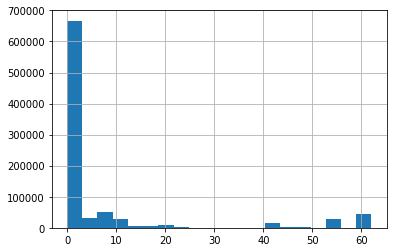

In [15]:
# How much data is missing in each row of the dataset?
rows_nans = azdias.isnull().sum(axis = 1)
num_columns = len(azdias.columns)
rows_nans = rows_nans*100/num_columns
rows_nans.hist(bins = 20)

In [16]:
data1 = azdias[rows_nans<30]
data2 = azdias[rows_nans>=30]

In [1]:
# Compare the distribution of values between the two subsets.

columns_few_missing = nans
nans.sort_values()

NameError: name 'nans' is not defined

We inspect the following features: <br>
FINANZTYP - Most descriptive financial type for an individual, <br>
LP_LEBENSPHASE_GROB - Life stage, rough scale, <br>
LP_STATUS_FEIN - Social status, fine scale, <br>
ANREDE_KZ - Gender, <br>
RETOURTYP_BK_S -Return type. <br>


In [18]:
features = ["FINANZTYP","LP_LEBENSPHASE_GROB","LP_STATUS_FEIN", "ANREDE_KZ", "RETOURTYP_BK_S"]

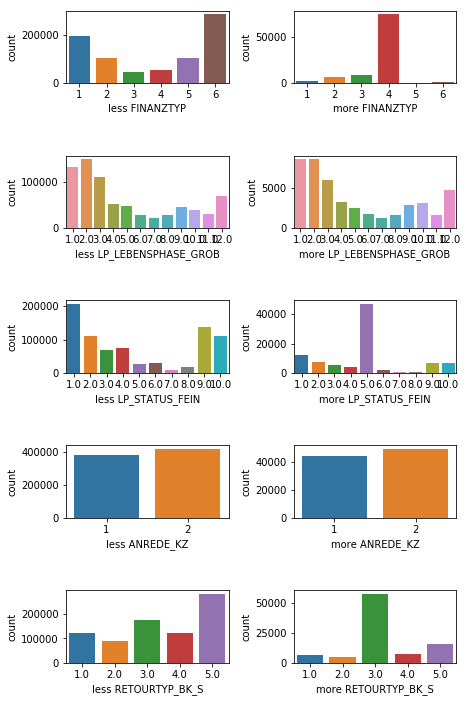

In [19]:
plt.figure(figsize = (7,12))
for i in range(5):
    plt.subplot(5,2, 1+2*i)
    sns.countplot(data = data1, x=features[i])
    plt.xlabel("less "+features[i])

    plt.subplot(5,2, 2+2*i )
    sns.countplot(data = data2, x=features[i])
    plt.xlabel("more "+features[i])
    
plt.subplots_adjust(wspace =0.4,hspace = 1)



The left hand side corresponds to the dataset with few/no missing values. The right hand side correspomds to the dataset with a large amount of missing values. We see that the distribution of some features is different across two datasets. <br>
For example, the financial feature "FINANZTYP" on the right hand side is concentrated around the "be prepared" type. The LP_STATUS_FEIN feature consists of the "minimalistic high-income earners" only. <br>
It looks like the two datasets in question have a very different structure.

## Step 2: Select and Re-Encode Features

In [20]:
# How many features are there of each data type?
types = feat_info.groupby("type").type.count()
print(types)

type
categorical    21
interval        1
mixed           7
numeric         7
ordinal        49
Name: type, dtype: int64


#### Step 2.1: Re-Encode Categorical Features

In [21]:
features = data1.nunique()

In [22]:
features = pd.DataFrame(features,columns = ["number_values"])
features.index

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN',
       'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB',
       'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S',
       'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT',
       'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT',
       'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'ZABEOTYP', 'ANZ_PERSONEN',
       'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE', 'CAMEO_DEUG_2015',
       'CAMEO

In [23]:
features = pd.DataFrame(features).merge(feat_info, \
        left_on = features.index, right_on = "attribute" , how = "left")

In [24]:
features.head()

,number_values,attribute,information_level,type,missing_or_unknown
0,4,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
1,2,ANREDE_KZ,person,categorical,"[-1,0]"
2,6,CJT_GESAMTTYP,person,categorical,[0]
3,5,FINANZ_MINIMALIST,person,ordinal,[-1]
4,5,FINANZ_SPARER,person,ordinal,[-1]


In [25]:
features[features.type=="mixed"]

,number_values,attribute,information_level,type,missing_or_unknown
13,40,LP_LEBENSPHASE_FEIN,person,mixed,[0]
14,12,LP_LEBENSPHASE_GROB,person,mixed,[0]
20,15,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1,0]"
51,8,WOHNLAGE,building,mixed,[-1]
54,21,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1,XX]"
73,5,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1,0]"


In [26]:
categ_vars_dummy =  features[(features.type == "categorical") & (features.number_values>2)].attribute

In [27]:
categ_vars_binary = features[(features.type == "categorical") & (features.number_values==2)].attribute

In [28]:
categ_vars_dummy

2        CJT_GESAMTTYP
9            FINANZTYP
10     GFK_URLAUBERTYP
15     LP_FAMILIE_FEIN
16     LP_FAMILIE_GROB
17      LP_STATUS_FEIN
18      LP_STATUS_GROB
19    NATIONALITAET_KZ
36         SHOPPER_TYP
39            ZABEOTYP
47         GEBAEUDETYP
52     CAMEO_DEUG_2015
53      CAMEO_DEU_2015
Name: attribute, dtype: object

In [29]:
categ_vars_dummy.values

array(['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN',
       'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB',
       'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP',
       'CAMEO_DEUG_2015', 'CAMEO_DEU_2015'], dtype=object)

In [30]:
categ_vars_binary

1            ANREDE_KZ
11    GREEN_AVANTGARDE
37             SOHO_KZ
38            VERS_TYP
50         OST_WEST_KZ
Name: attribute, dtype: object

In [31]:
data1["OST_WEST_KZ"].unique()

array(['W', 'O'], dtype=object)

Binary variables are: ANREDE_KZ, GREEN_AVANTGARDE, SOHO_KZ, VERS_TYP and OST_WEST_KZ. <br>

There are several (13) multi-level categorical variables. We will reencode them all. 

Also, notice that the feature "OST_WEST_KZ" (location with respect to East/West Germany) takes two values - O and W. We will transform these into 1 and 2. 





In [32]:
lst = ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN','LP_FAMILIE_GROB',\
            'LP_STATUS_FEIN', 'LP_STATUS_GROB','NATIONALITAET_KZ', 'SHOPPER_TYP',\
            'ZABEOTYP','CAMEO_DEUG_2015']

In [33]:
# Re-encode categorical variables to be kept in the analysis:
data  = pd.get_dummies(data=data1,columns=lst)

In [34]:
data["OST_WEST_KZ"] = data["OST_WEST_KZ"].apply(lambda x: 1 if x=="O" else 2)

We reencoded all 11 multi-level features using pandas.get_dummies. The feature OST_WEST_KZ now takes 2 numerical values.

#### Step 1.2.2: Engineer Mixed-Type Features


In [35]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables:

#1 = Mainstream, 2 = Avantgarde
movement = {1:1,2:2,3:1,4:2,5:1,6:2,7:2,8:1,9:2,10:1,11:2,12:1,13:2,14:1,15:2}
decade = {1:4,2:4,3:5,4:5,5:6,6:6,7:6,8:7,9:7,10:8,11:8,12:8,13:8,14:9,15:9}

data["movement"] = data["PRAEGENDE_JUGENDJAHRE"].apply(lambda x: movement.get(x))
data["decade"] = data["PRAEGENDE_JUGENDJAHRE"].apply(lambda x: decade.get(x))


In [36]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables:
data["CAMEO_INTL_2015_wealth"] = data["CAMEO_INTL_2015"].apply(lambda x: x[0] if type(x)==str else 0).astype(int)
data["CAMEO_INTL_2015_life"] = data["CAMEO_INTL_2015"].apply(lambda x: x[:-1] if type(x)==str else 0).astype(int)

In [37]:
#dropping CAMEO_INTL_2015 as well as PRAEGENDE_JUGENDJAHRE:
data = data.drop(["PRAEGENDE_JUGENDJAHRE","CAMEO_INTL_2015"],axis = 1);




We split the following mixed features into two parts each: PRAEGENDE_JUGENDJAHRE, CAMEO_INTL_2015.

In the next step, we will drop the rest of the mixed-type features: LP_LEBENSPHASE_FEIN, LP_LEBENSPHASE_GROB, WOHNLAGE and PLZ8_BAUMAX <br>
We will also drop CAMEO_DEU_2015 which is a more detailed version of CAMEO_DEUG_2015. Same goes for GEBAEUDETYP which has a lot of mixed data in the description.

#### Step 2.3: Complete Feature Selection


We will drop the rest of the mixed-type features: LP_LEBENSPHASE_FEIN, LP_LEBENSPHASE_GROB, WOHNLAGE and PLZ8_BAUMAX <br>
We will also drop CAMEO_DEU_2015 which is a more detailed version of CAMEO_DEUG_2015. Same goes for GEBAEUDETYP which has a lot of mixed data in the description

In [38]:
data = data.drop(["CAMEO_DEU_2015","LP_LEBENSPHASE_FEIN", "LP_LEBENSPHASE_GROB", "WOHNLAGE", "PLZ8_BAUMAX","GEBAEUDETYP"],axis = 1);

In [39]:
data

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,movement,decade,CAMEO_INTL_2015_wealth,CAMEO_INTL_2015_life
1,1.0,2,1,5,2,5,4,5,0,3.0,...,0,0,0,0,1,0,1.0,9.0,5,5
2,3.0,2,1,4,1,2,3,5,1,3.0,...,1,0,0,0,0,0,2.0,9.0,2,2
3,4.0,2,4,2,5,2,1,2,0,2.0,...,0,0,0,0,0,0,1.0,7.0,1,1
4,3.0,1,4,3,4,1,3,2,0,3.0,...,0,0,1,0,0,0,1.0,7.0,4,4
5,1.0,2,3,1,5,2,2,5,0,3.0,...,0,0,0,0,1,0,1.0,5.0,5,5
6,2.0,2,1,5,1,5,4,3,0,2.0,...,1,0,0,0,0,0,1.0,8.0,2,2
7,1.0,1,3,3,4,1,3,2,0,1.0,...,0,0,0,0,0,0,1.0,7.0,1,1
8,3.0,1,4,4,2,4,2,2,1,3.0,...,0,0,0,0,0,0,2.0,8.0,1,1
9,3.0,2,2,4,2,3,5,4,1,2.0,...,0,0,0,0,0,0,2.0,9.0,1,1
10,3.0,2,2,2,5,3,1,5,0,2.0,...,0,0,0,0,0,1,1.0,5.0,5,5


### Step 1.3: Create a Cleaning Function

In [40]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    #############################################################
    #Convert missing value codes into NaN's:
    
    #parsing function
    def list_as_str_into_list (st):
        lst = []
        if st == "[]":
            return np.NaN
        else:
            for x in st.strip("[]").split(","):
                try:
                    lst.append(int(x))
                except:   ### if x is not an integer
                    lst.append(x)
            return(lst)   

    missing_values = feat_info.missing_or_unknown
    missing_values = missing_values.apply(lambda x : list_as_str_into_list(x))
    
    #setting up the dictionary
    
    dict_missing = {x:y for x,y in zip(feat_info.attribute, missing_values)}
    #replacing datacodes for missing data with NaN's 
    df = df.replace(dict_missing, np.NaN)
    
    ##############################################################
    #remove the columns with more than 30% of the missing data:  
    
    
    df = df.drop(['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX'],axis=1)
    
    
    ##############################################################
    # Removing rows that have lots of missing values:
    
    row_nans = df.isnull().sum(axis = 1)
    num_columns = len(df.columns)
    row_nans = row_nans*100/num_columns
    
    #remove the rows with more than 30% of the missing values
    df = df.drop(row_nans[row_nans>30].index,axis=0) 
    
    ##############################################################
    #dropping columns with mixed values as well
    df = df.drop(["CAMEO_DEU_2015","LP_LEBENSPHASE_FEIN", "LP_LEBENSPHASE_GROB", "WOHNLAGE", "PLZ8_BAUMAX","GEBAEUDETYP"],axis = 1)
    
    
    # re-encoding column values:
    
    # encode some of the categorical features
       
#     lst =  ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN','LP_FAMILIE_GROB',\
#             'LP_STATUS_FEIN', 'LP_STATUS_GROB','NATIONALITAET_KZ', 'SHOPPER_TYP',\
#             'ZABEOTYP', 'GEBAEUDETYP','CAMEO_DEUG_2015']
    
       
    
    
    
    
    # OST_WEST_KZ must be binary with int values
    df["OST_WEST_KZ"] = df["OST_WEST_KZ"].apply(lambda x: 1 if x=="O" else 2)
    
    #1 = Mainstream, 2 = Avantgarde
    movement = {1:1,2:2,3:1,4:2,5:1,6:2,7:2,8:1,9:2,10:1,11:2,12:1,13:2,14:1,15:2}
    decade = {1:4,2:4,3:5,4:5,5:6,6:6,7:6,8:7,9:7,10:8,11:8,12:8,13:8,14:9,15:9}

    df["movement"] = df["PRAEGENDE_JUGENDJAHRE"].apply(lambda x: movement.get(x))
    df["decade"] = df["PRAEGENDE_JUGENDJAHRE"].apply(lambda x: decade.get(x))
    
    df["CAMEO_INTL_2015_wealth"] = df["CAMEO_INTL_2015"].apply(lambda x: x[0] if type(x)==str else 0).astype(int)
    df["CAMEO_INTL_2015_life"] = df["CAMEO_INTL_2015"].apply(lambda x: x[:-1] if type(x)==str else 0).astype(int)
    
    df = df.drop(["PRAEGENDE_JUGENDJAHRE","CAMEO_INTL_2015"],axis = 1)
    
    ########## DUMMY VARIABLES
    
    lst =  ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN','LP_FAMILIE_GROB',\
            'LP_STATUS_FEIN', 'LP_STATUS_GROB','NATIONALITAET_KZ', 'SHOPPER_TYP',\
            'ZABEOTYP','CAMEO_DEUG_2015']
    
    df  = pd.get_dummies(df, columns = lst)
    
    
    # Return the cleaned dataframe
    
    return df
    
    

Double check that the function returns the same data frame:

In [41]:
df = pd.read_csv("Udacity_AZDIAS_Subset.csv",sep=";")

In [42]:
df = clean_data(df)

In [43]:
df

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,ZABEOTYP_6,CAMEO_DEUG_2015_1,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9
1,1.0,2,1,5,2,5,4,5,0,3.0,...,0,0,0,0,0,0,0,0,1,0
2,3.0,2,1,4,1,2,3,5,1,3.0,...,0,0,0,0,1,0,0,0,0,0
3,4.0,2,4,2,5,2,1,2,0,2.0,...,0,0,1,0,0,0,0,0,0,0
4,3.0,1,4,3,4,1,3,2,0,3.0,...,0,0,0,0,0,0,1,0,0,0
5,1.0,2,3,1,5,2,2,5,0,3.0,...,0,0,0,0,0,0,0,0,1,0
6,2.0,2,1,5,1,5,4,3,0,2.0,...,0,0,0,0,1,0,0,0,0,0
7,1.0,1,3,3,4,1,3,2,0,1.0,...,0,0,1,0,0,0,0,0,0,0
8,3.0,1,4,4,2,4,2,2,1,3.0,...,1,1,0,0,0,0,0,0,0,0
9,3.0,2,2,4,2,3,5,4,1,2.0,...,0,1,0,0,0,0,0,0,0,0
10,3.0,2,2,2,5,3,1,5,0,2.0,...,0,0,0,0,0,0,0,0,0,1
